<h1 style="color:blue"><b>EDA: Dataset Description</h1>

<div style="color:blue">The dataset contains over a hundred variables that describe the attributes of life insurance applicants. The objective is to predict the "Response" variable for each Id in the test set. This "Response" variable is an ordinal measure of risk with 8 levels.</div>


<ul>
<li style="color:blue">Id: A unique identifier associated with an application.</li>
<li style="color:blue">Product_Info_1-7: A set of normalized variables relating to the product applied for.</li>
<li style="color:blue">Ins_Age, Ht, Wt, BMI: are all normalized metrics from the applicant.</li>
<li style="color:blue">Employment_Info_1-6: A set of normalized variables relating to the employment history of the applicant.</li>
<li style="color:blue">InsuredInfo_1-6: A set of normalized variables providing information about the applicant.</li>
<li style="color:blue">Insurance_History_1-9: A set of normalized variables relating to the insurance history of the applicant.</li>
<li style="color:blue">Family_Hist_1-5: A set of normalized variables relating to the family history of the applicant.</li>
<li style="color:blue">Medical_History_1-41: A set of normalized variables relating to the medical history of the applicant.</li>
<li style="color:blue">Medical_Keyword_1-48: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.</li>
<li style="color:blue">Response:This is the target variable, an ordinal variable relating to the final decision associated with an application</li>
</ul>


<div style="color:blue; text-decoration: underline; font-weight: bold;">The following variables are all categorical (nominal):</div>

<div style="color:blue">Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41</div>

<div style="color:blue; text-decoration: underline; font-weight: bold;">
The following variables are continuous:</div>
<div style="color:blue">
Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5 </div>

<div style="color:blue; text-decoration: underline; font-weight: bold;">The following variables are discrete:</div>
<div style="color:blue">
Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32</div>
<div style="color:blue; text-decoration: underline; font-weight: bold;">Dummy variables:</div>
<div style="color:blue">Medical_Keyword_1-48 are dummy variables. </div>

<h1 style="color:blue">My Approach to the Problem </h1>

<div style="color:blue"> 
<p>This dataset poses a challenge for aspiring data scientists due to its numerous features and lack of transparency. Although the data has already been normalized, the abstract nature of the observations makes it difficult to comprehend the tangible meaning without further investigation. Fortunately, the dataset provider has given a description of the features, which allows for easier grouping and analysis.</p>
    
<p>During the data wrangling phase, I discovered that some columns were missing significant amounts of data, possibly due to a correlation with other variables. To tackle this issue, my plan is to create subsets of the data frame for categorical, continuous, discrete, and dummy variables. I will then focus on the Response attribute and clearly define the problem we are trying to solve.</p>

<p>Next, I will visualize the distributions for each variable and try to determine the normalization method used. I will also take note of any outliers or significant issues found in the data. My goal after the exploratory data analysis is to gain a deep understanding of each variable and develop a plan to address the missing values and normalized data.</p>
 </div>

In [2]:
#import packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
#import csv file
risk_data= pd.read_csv(r"C:\Users\brian\Documents\Predicting Risk for Life Insurance Applications with LightGBM\Original Data\Risk Data.csv")

In [3]:
risk_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


<h1 style="color:blue"><b> Reviewing Missing Values: </h1>

In [5]:
# looking at our missing vlaue columns 
missing1 = pd.concat([risk_data.isnull().sum(), 100 * risk_data.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing1 = missing1[missing1['count'] > 0]  # keep only columns with missing values
missing1 = missing1.sort_values(by='count', ascending=False)
missing1

,count,%
Medical_History_10,58824,99.061990
Medical_History_32,58274,98.135767
Medical_History_24,55580,93.598963
Medical_History_15,44596,75.101463
Family_Hist_5,41811,70.411411
Family_Hist_3,34241,57.663226
Family_Hist_2,28656,48.257860
Insurance_History_5,25396,42.767889
Family_Hist_4,19184,32.306630
Employment_Info_6,10854,18.278574


In [6]:
missing1 = pd.concat([risk_data.isnull().sum(), 100 * risk_data.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing1 = missing1.sort_values(by='count', ascending=False)

# Add a row for zero values
missing1.loc['zero_values'] = [len(risk_data) - missing1['count'].sum(), 0]

# Keep only columns with missing or zero values
missing1 = missing1[missing1['count'] > 0]

print(missing1)

                     count          %
Medical_History_10   58824  99.061990
Medical_History_32   58274  98.135767
Medical_History_24   55580  93.598963
Medical_History_15   44596  75.101463
Family_Hist_5        41811  70.411411
Family_Hist_3        34241  57.663226
Family_Hist_2        28656  48.257860
Insurance_History_5  25396  42.767889
Family_Hist_4        19184  32.306630
Employment_Info_6    10854  18.278574
Medical_History_1     8889  14.969435
Employment_Info_4     6779  11.416110
Employment_Info_1       19   0.031997


<AxesSubplot:>

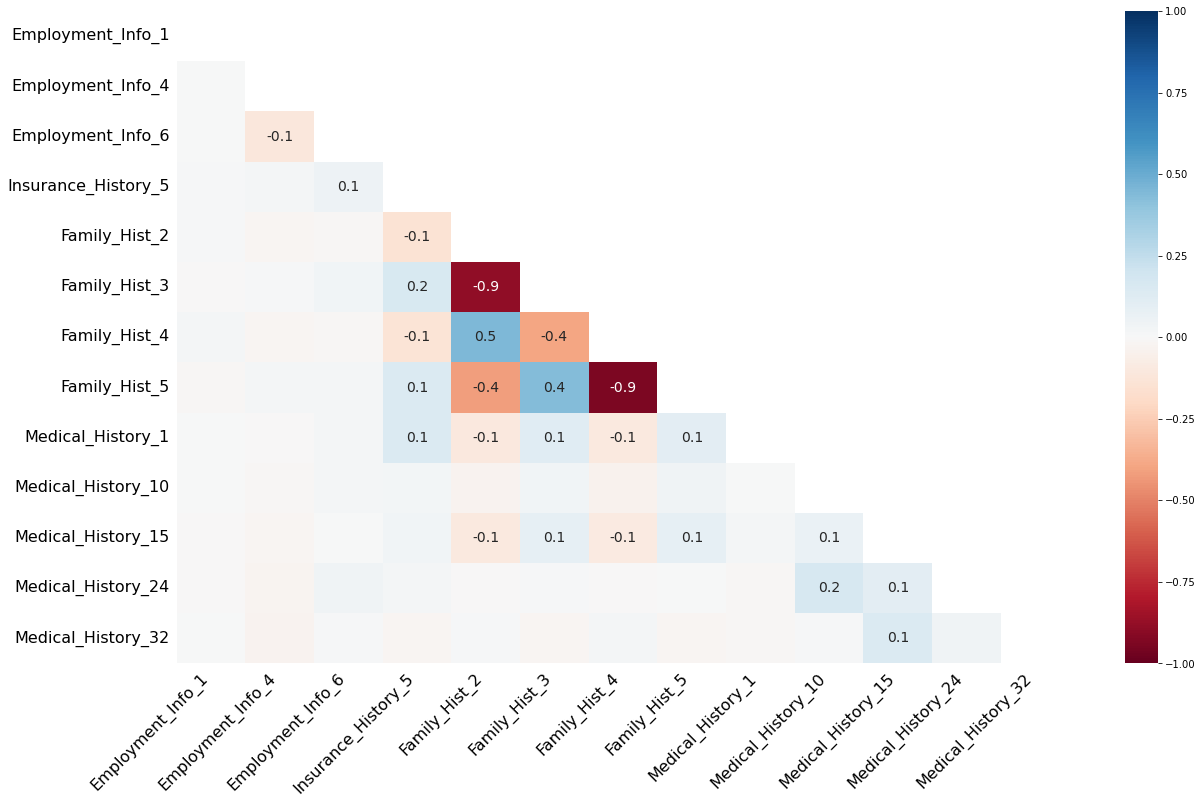

In [7]:
msno.heatmap(risk_data)

<div style="color:blue">The missing data are continuous and NOT categorical variables. Family history 3 and 2 have a strong negative correlation and Family history 5 and 4 also have a strong negative correlation. 
 </div>

<h1 style="color:blue"><b> Reviewing the Response Column: </h1>

In [8]:
risk_data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

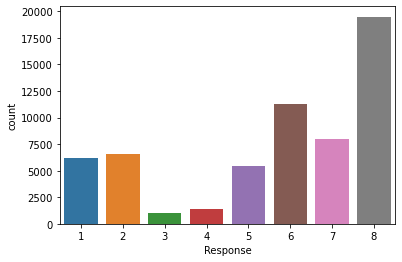

In [9]:
sns.countplot(x='Response', data=risk_data)

<div style="color:blue">Notes: The response variable has 8 distinct values. This poses a multi-class classification problem. There is a significant presence of Response 8, while Response 3 and 4 have limited occurrences, resulting in an imbalanced distribution. This class imbalance should be taken into account during the modeling process. </div>

<h1 style="color:blue"> Visualizing Categorical Variables:  </h1>

In [10]:
#List of categorical variables given by data source
nom_list = ['Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6', 
            'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1', 
            'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 
            'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 
            'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2', 
            'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 
            'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 
            'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 
            'Medical_History_20', 'Medical_History_21', 'Medical_History_22', 'Medical_History_23', 'Medical_History_25', 
            'Medical_History_26', 'Medical_History_27', 'Medical_History_28', 'Medical_History_29', 'Medical_History_30', 
            'Medical_History_31', 'Medical_History_33', 'Medical_History_34', 'Medical_History_35', 'Medical_History_36', 
            'Medical_History_37', 'Medical_History_38', 'Medical_History_39', 'Medical_History_40', 'Medical_History_41']

In [11]:
#Creating a subset of categorical variables 
nom_risk_data = risk_data[nom_list]
nom_risk_data.shape[1]

60

In [12]:
#Sub setting binary columns 
binary_cols = [col for col in nom_risk_data.columns if nom_risk_data[col].nunique() == 2]
nom_risk_data_binary = nom_risk_data[binary_cols]
nom_risk_data_binary.shape[1]

15

In [13]:
# Describe binary columns
nom_risk_data_binary.describe()

,Product_Info_1,Product_Info_5,Product_Info_6,Employment_Info_3,Employment_Info_5,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Medical_History_4,Medical_History_22,Medical_History_33,Medical_History_38
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,2.006955,2.673599,1.300904,2.142958,2.007427,2.883666,1.027180,1.409188,1.038531,1.727606,1.654873,1.981644,2.804618,1.004850
std,0.160191,0.083107,0.739103,0.715034,0.350033,0.085858,0.320627,0.231566,0.491688,0.274915,0.445195,0.475414,0.134236,0.593798,0.069474
min,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000
50%,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000
75%,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000
max,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000


In [14]:
# Create frequency count table binary columns
nom_risk_data_binary.apply(pd.value_counts)

,Product_Info_1,Product_Info_5,Product_Info_6,Employment_Info_3,Employment_Info_5,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Medical_History_4,Medical_History_22,Medical_History_33,Medical_History_38
1,57816.0,NaN,9691.0,50447.0,NaN,NaN,NaN,58574.0,35083.0,58237.0,16175.0,20494.0,1090.0,5801.0,59093.0
2,1565.0,58968.0,NaN,NaN,50892.0,58940.0,6908.0,NaN,24298.0,NaN,43206.0,38887.0,58291.0,NaN,288.0
3,NaN,413.0,49690.0,8934.0,8489.0,441.0,52473.0,807.0,NaN,1144.0,NaN,NaN,NaN,53580.0,NaN


In [15]:
#Sub setting trinary columns
tri_cols = [col for col in nom_risk_data.columns if nom_risk_data[col].nunique() == 3]
nom_risk_data_tri = nom_risk_data[tri_cols]
nom_risk_data_tri.shape[1]

40

In [16]:
# Describe trinary columns
nom_risk_data_tri.describe()

,Product_Info_7,InsuredInfo_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_3,...,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_39,Medical_History_40,Medical_History_41
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.043583,1.209326,1.055792,2.146983,1.958707,1.901989,2.048484,2.419360,2.686230,2.102171,...,2.542699,2.040771,2.985265,2.689076,1.002055,2.179468,1.938398,2.830720,2.967599,1.641064
std,0.291949,0.417939,0.329328,0.989139,0.945739,0.971223,0.755149,0.509577,0.483159,0.303098,...,0.839904,0.198100,0.170989,0.724661,0.063806,0.412633,0.240574,0.556665,0.252427,0.933361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000
75%,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [17]:
# Create frequency count table trinary columns
nom_risk_data_tri.apply(pd.value_counts)

,Product_Info_7,InsuredInfo_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_3,...,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_39,Medical_History_40,Medical_History_41
1,58086,47223,57724,25326,27832,31201,15561,480,538,4,...,13576,4,437,9230,59319,683,3660,5025,961,40347
2,2,11886,1,1,6169,2799,25380,33519,17556,53306,...,3,56952,1,3,2,47358,55719,2,2,1
3,1293,272,1656,34054,25380,25381,18440,25382,41287,6071,...,45802,2425,58943,50148,60,11340,2,54354,58418,19033


In [18]:
#Sub setting columns with more than 3 unique values
cols_over_three_unique = [col for col in nom_risk_data.columns if nom_risk_data[col].nunique() > 3]
nom_risk_data_over_three = nom_risk_data[cols_over_three_unique]
nom_risk_data_over_three.shape[1]

5

In [19]:
# Describe columns with more than 3 unique values
nom_risk_data_over_three.describe()

,Product_Info_3,Employment_Info_2,InsuredInfo_3,Medical_History_2
count,59381.000000,59381.000000,59381.000000,59381.000000
mean,24.415655,8.641821,5.835840,253.987100
std,5.072885,4.227082,2.674536,178.621154
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,9.000000,3.000000,112.000000
50%,26.000000,9.000000,6.000000,162.000000
75%,26.000000,9.000000,8.000000,418.000000
max,38.000000,38.000000,11.000000,648.000000


In [20]:
risk_data['Medical_History_2'].nunique()

579

In [21]:
risk_data['Product_Info_3'].nunique()

34

In [22]:
risk_data['Employment_Info_2'].nunique()

36

In [23]:
risk_data['InsuredInfo_3'].nunique()

11

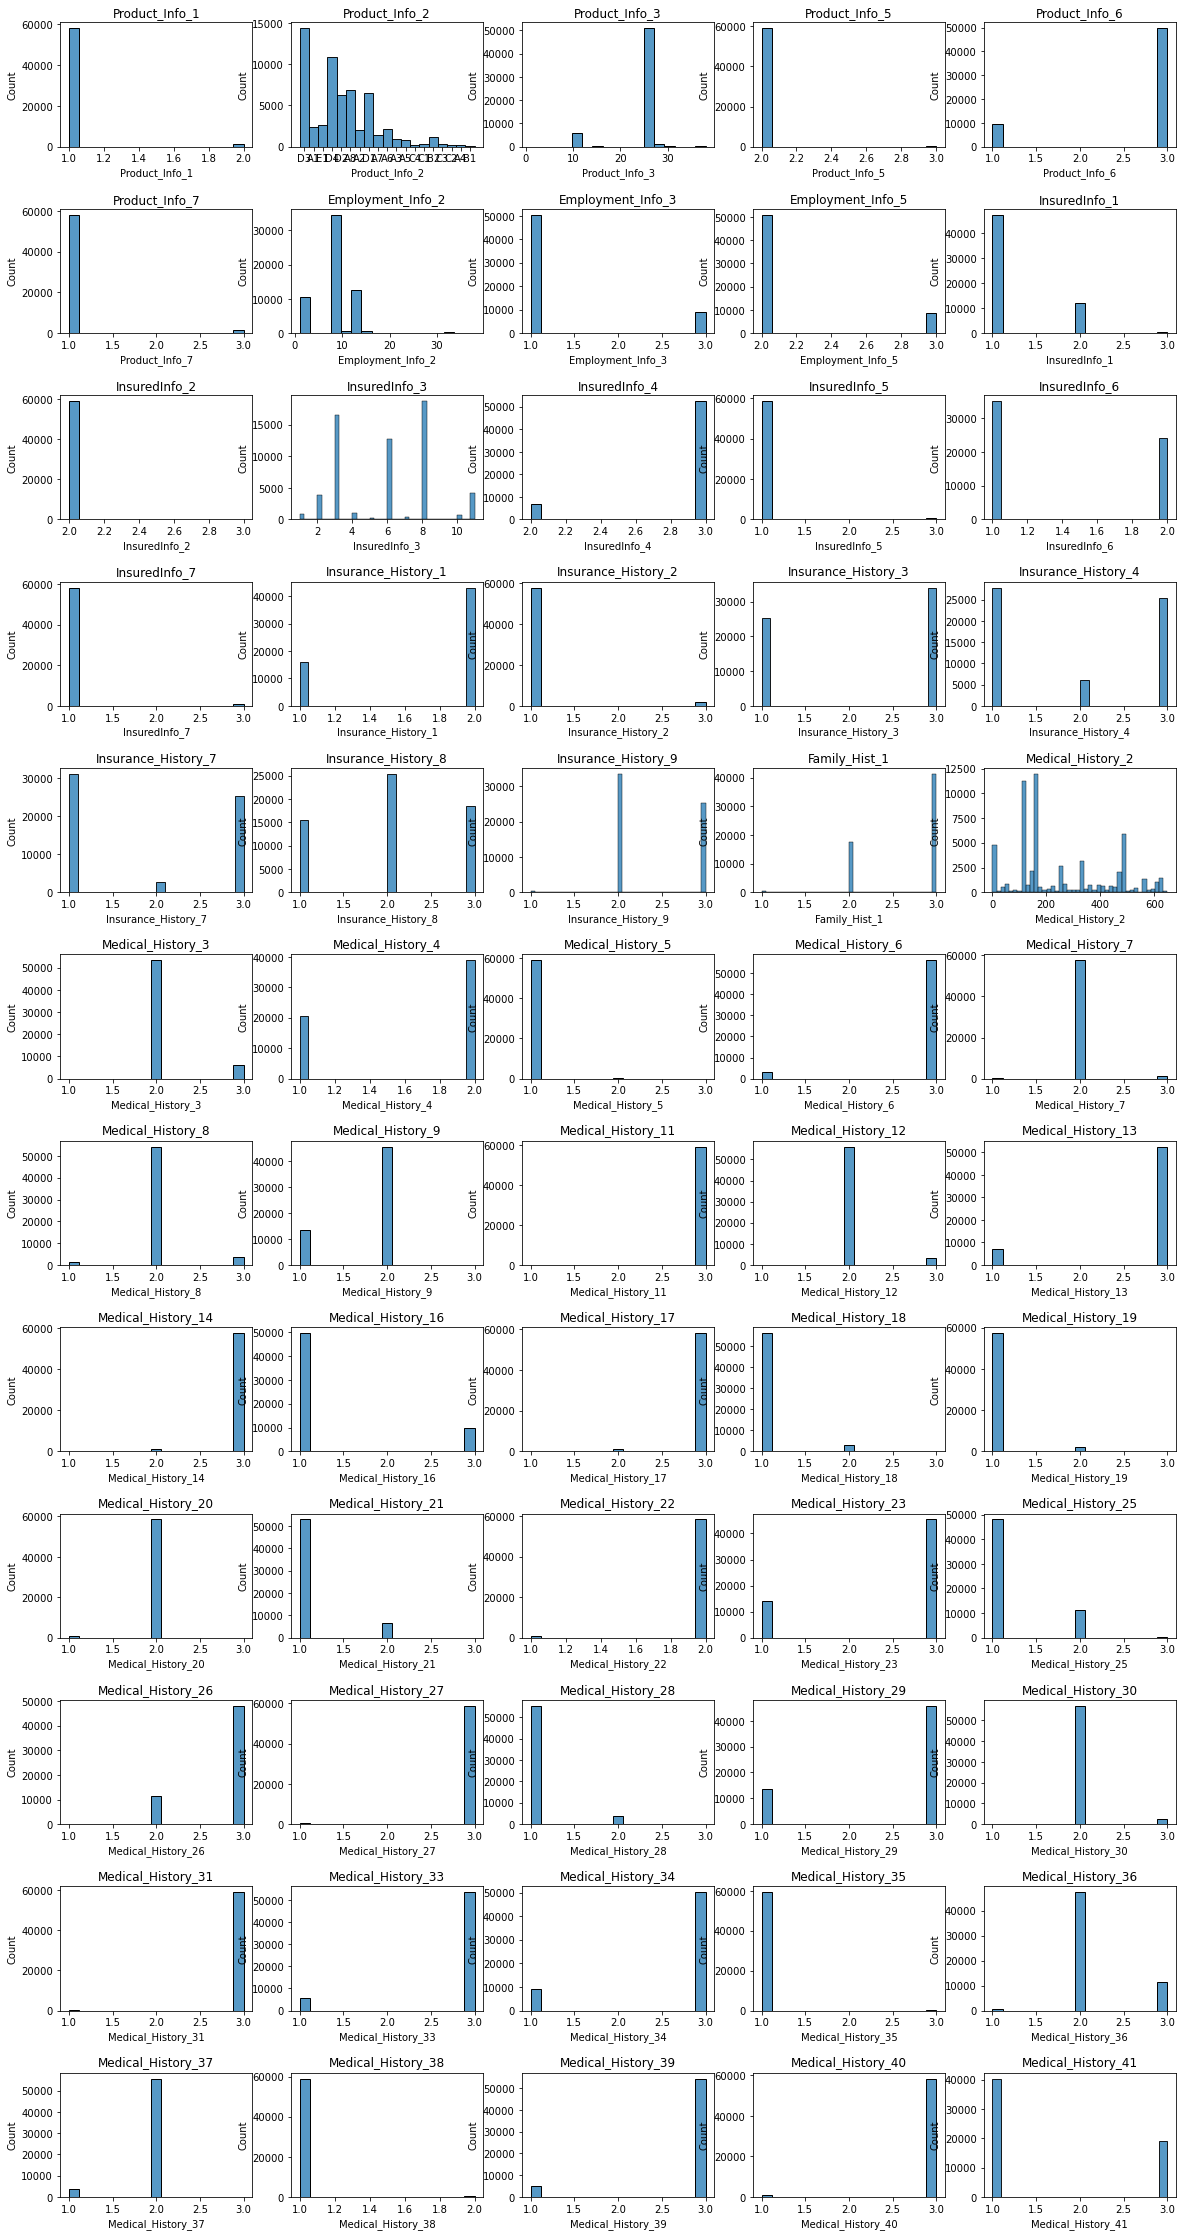

In [24]:
# Determine the number of rows and columns needed for the subplots
nrows = int(np.ceil(len(nom_risk_data.columns) / 5))
ncols = min(len(nom_risk_data.columns), 5)

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,40), 
                         gridspec_kw={'hspace': 0.5})

# Loop through each column and create a histogram subplot
for i, column in enumerate(nom_risk_data.columns):
    row = i // ncols
    col = i % ncols
    sns.histplot(nom_risk_data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.show()

<div style="color:blue">Notes: The binary variables exhibit varying values: some with 1 and 2, while others with 2 and 3. On the other hand, trenary variables hold values of 1, 2, and 3. The Medical_History_2 variable comprises 648 values, while Product_info_3 and Employment_info_2 each contain 38 values, and InsuredInfo_3 comprises 11 values. Product_info_2 holds alphabetic values that require attention. It appears that a positive correlation exists between Insurance_history_4 and 8, correlating with Family_History_1. Additionally, there are other notable correlations that may be difficult to discern from the heat map. </div>

<h1 style="color:blue"> Visualizing Continuous Variables:  </h1>

In [26]:
#List of continuous variables given by data source
cont_list = ['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 
             'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 
             'Family_Hist_5']

In [27]:
#Creating a subset of continuous variables 
cont_risk_data = risk_data[cont_list]
cont_risk_data.shape[1]

13

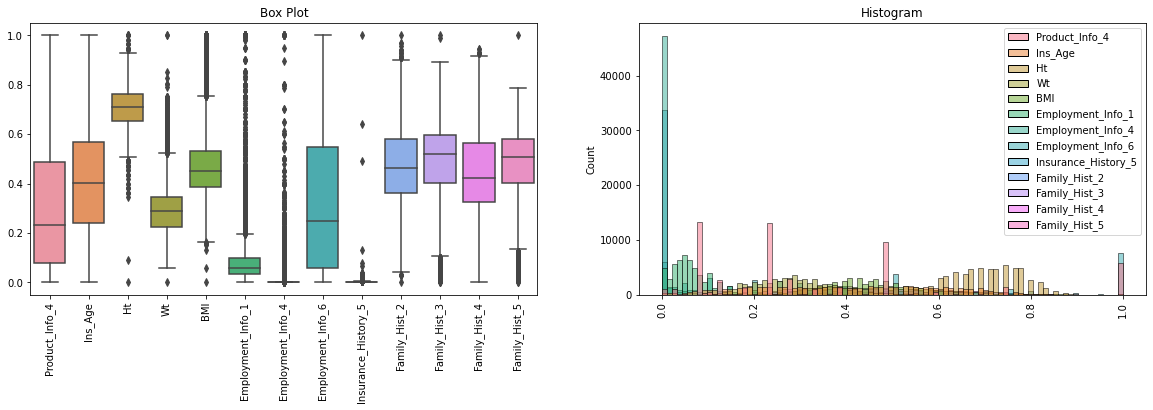

In [28]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Create box plots for each column in the left subplot
sns.boxplot(data=cont_risk_data, ax=axes[0])

# Rotate x-axis labels for the box plot to 90 degrees
axes[0].tick_params(axis='x', labelrotation=90)

# Create histograms for each column in the right subplot
sns.histplot(data=cont_risk_data, ax=axes[1])

# Rotate x-axis labels for the histogram to 90 degrees
axes[1].tick_params(axis='x', labelrotation=90)

# Set titles for subplots
axes[0].set_title("Box Plot")
axes[1].set_title("Histogram")

# Show the plot
plt.show()

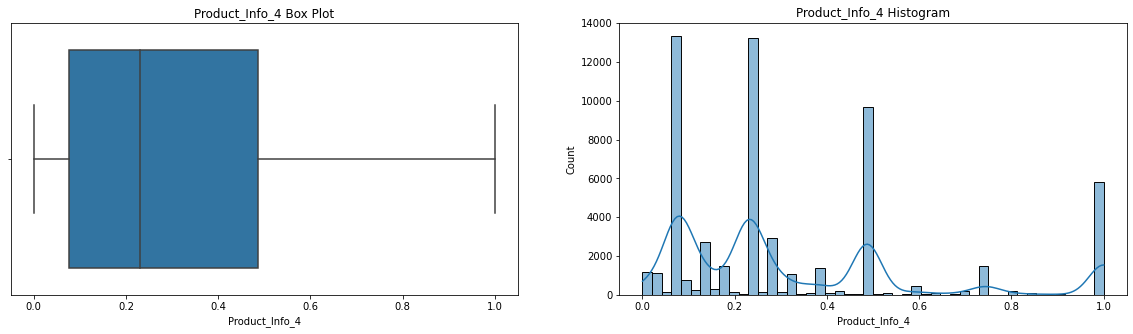

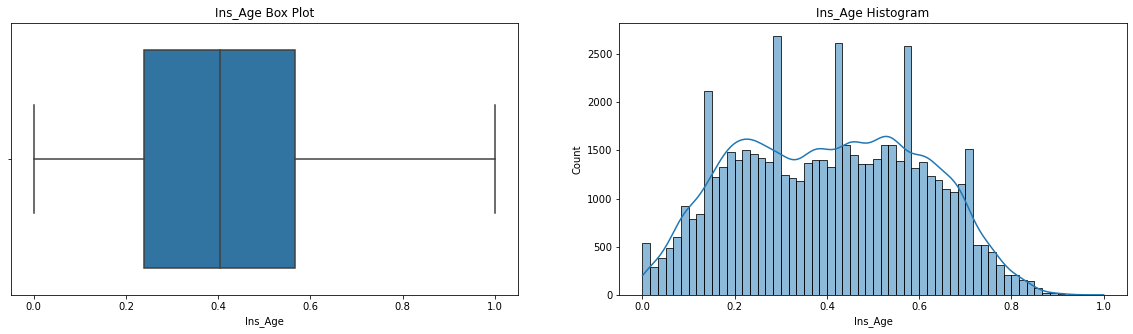

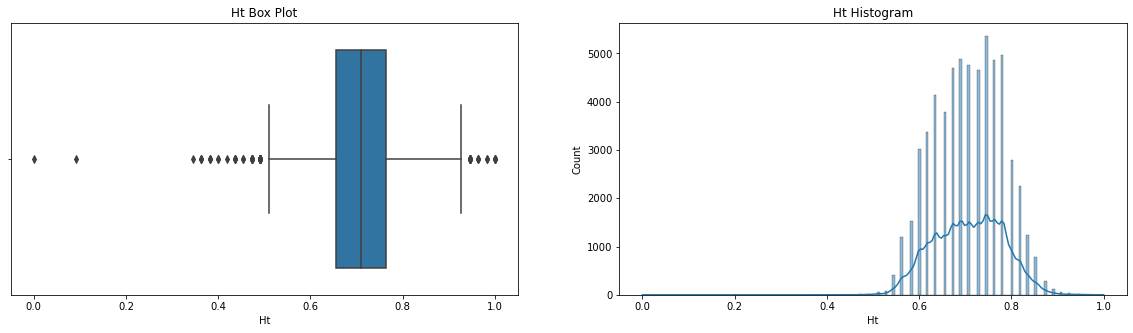

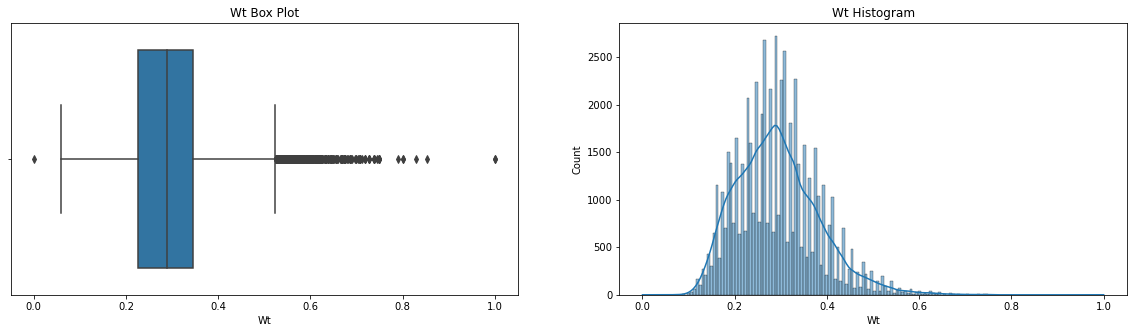

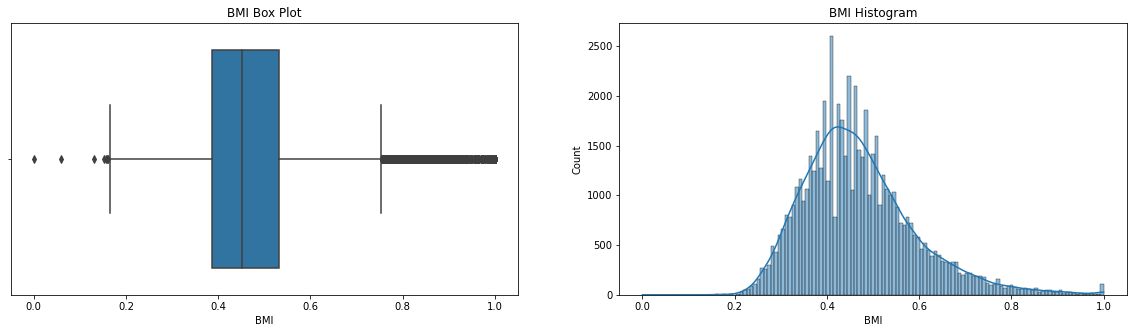

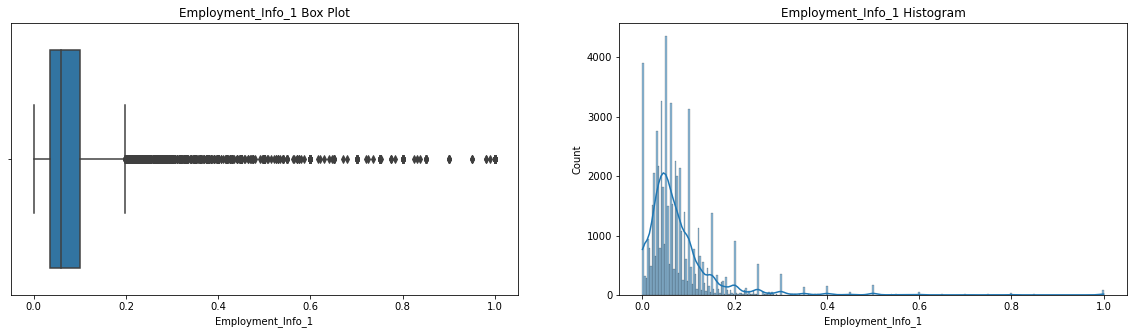

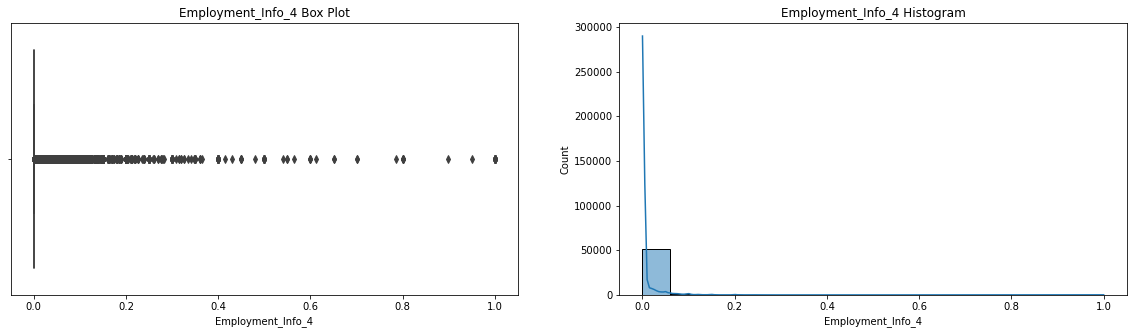

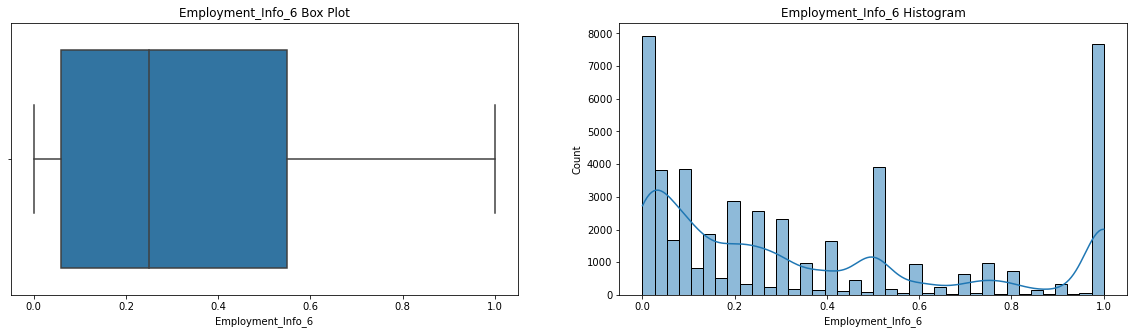

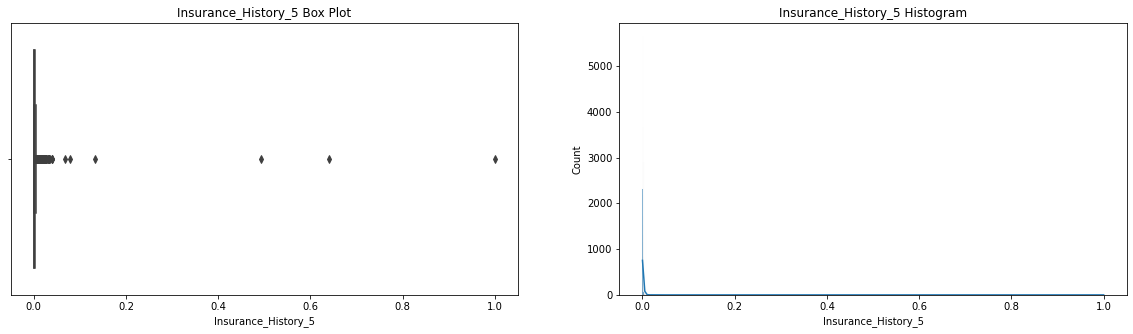

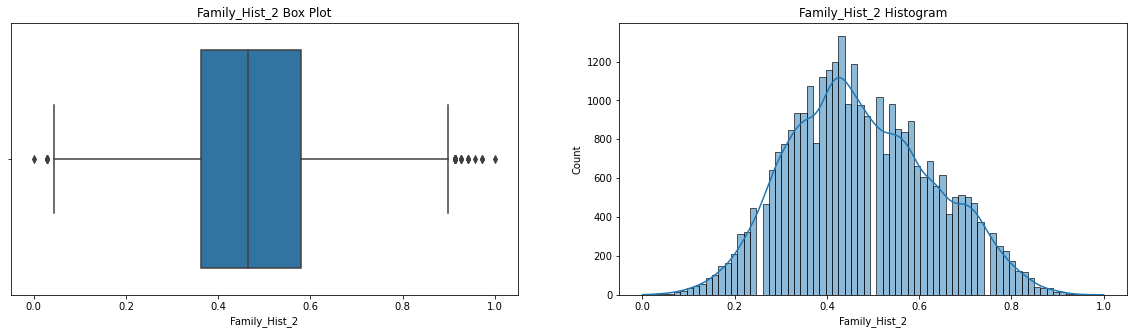

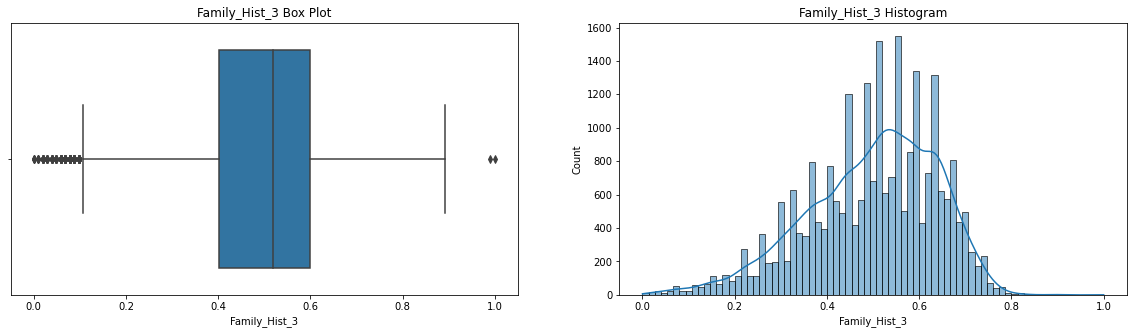

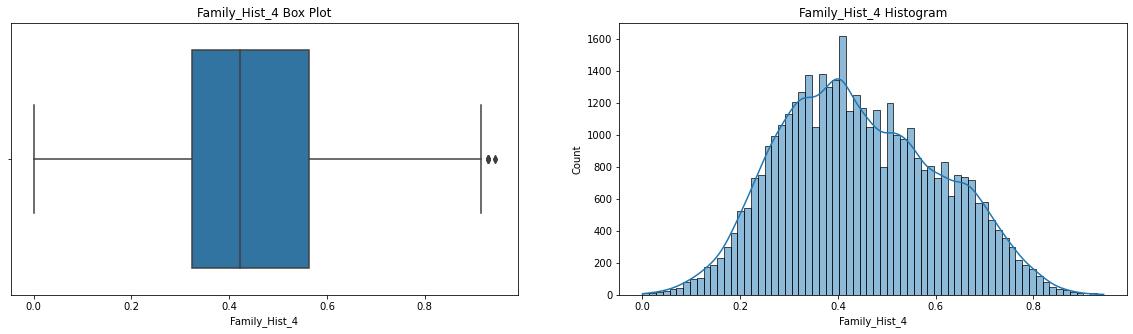

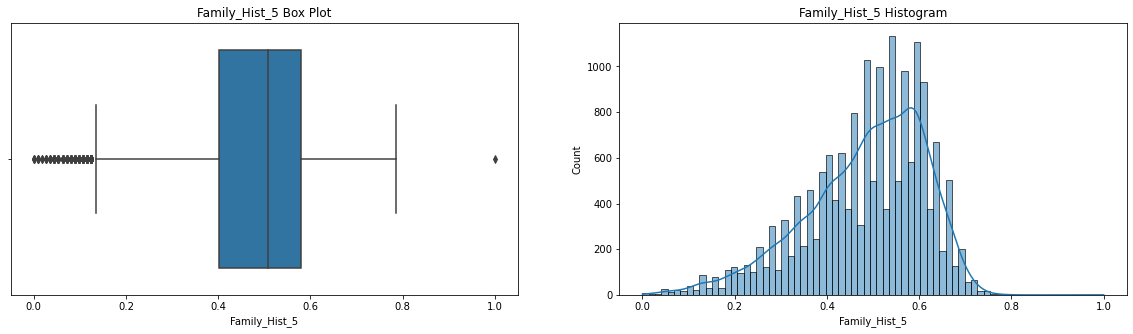

In [29]:
# Loop through each column in the DataFrame
for col in cont_risk_data.columns:

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Create box plot for the column in the left subplot
    sns.boxplot(x=cont_risk_data[col], ax=axes[0])

    # Create histogram for the column in the right subplot
    sns.histplot(x=cont_risk_data[col], ax=axes[1], kde=True)

    # Set titles for subplots
    axes[0].set_title(f"{col} Box Plot")
    axes[1].set_title(f"{col} Histogram")

    # Show the plot
    plt.show()

In [30]:
cont_risk_data.describe()

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000
mean,0.328952,0.405567,0.707283,0.292587,0.469462,0.077582,0.006283,0.361469,0.001733,0.474550,0.497737,0.444890,0.484635
std,0.282562,0.197190,0.074239,0.089037,0.122213,0.082347,0.032816,0.349551,0.007338,0.154959,0.140187,0.163012,0.129200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.238806,0.654545,0.225941,0.385517,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786
50%,0.230769,0.402985,0.709091,0.288703,0.451349,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929
75%,0.487179,0.567164,0.763636,0.345188,0.532858,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000


<div style="color:blue">Notes: The continuous variables appear to have numerous outliers, with only Product_info_4 and Age showing no significant outliers out of the 13 variables. Notably, Family_hist_4 has a maximum value of 0.94, which could be an error resulting from previous data normalization. </div>

<h1 style="color:blue"> Visualizing Discrete Variables:  </h1>

In [33]:
#List of discrete variables given by data source
disc_list = ['Medical_History_1', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

In [34]:
#Creating a subset of discrete variables 
disc_risk_data = risk_data[disc_list]
disc_risk_data.shape[1]

5

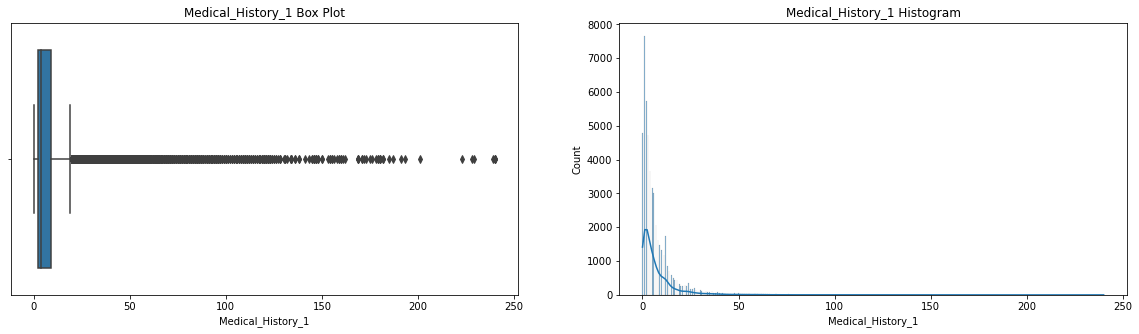

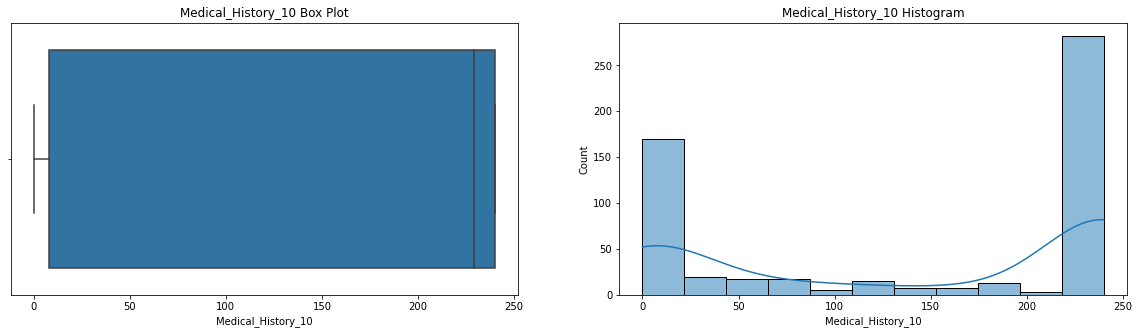

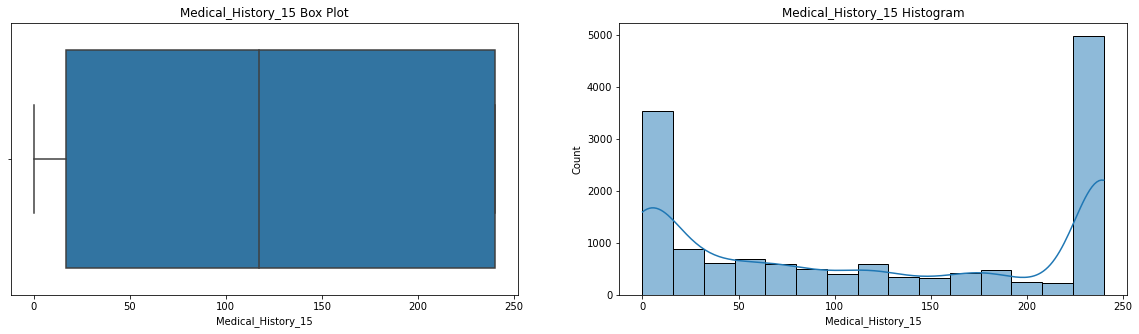

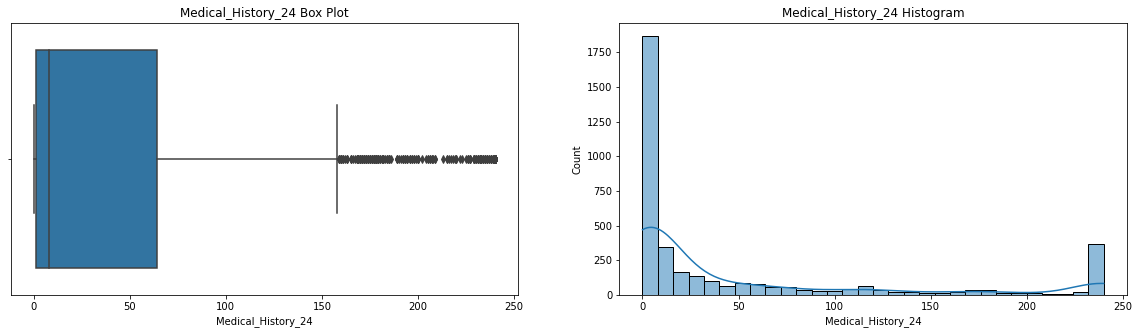

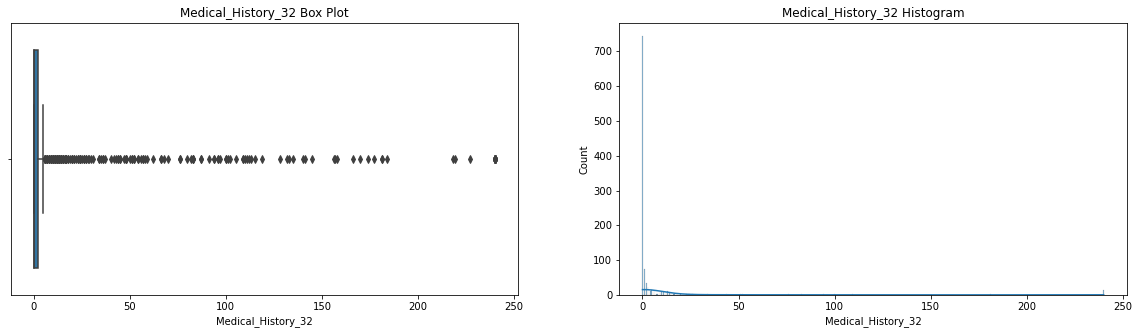

In [35]:
# Loop through each column in the DataFrame
for col in disc_risk_data.columns:

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Create box plot for the column in the left subplot
    sns.boxplot(x=disc_risk_data[col], ax=axes[0])

    # Create histogram for the column in the right subplot
    sns.histplot(x=disc_risk_data[col], ax=axes[1], kde=True)

    # Set titles for subplots
    axes[0].set_title(f"{col} Box Plot")
    axes[1].set_title(f"{col} Histogram")

    # Show the plot
    plt.show()

In [36]:
disc_risk_data.describe()

,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
count,50492.000000,557.000000,14785.000000,3801.000000,1107.000000
mean,7.962172,141.118492,123.760974,50.635622,11.965673
std,13.027697,107.759559,98.516206,78.149069,38.718774
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,17.000000,1.000000,0.000000
50%,4.000000,229.000000,117.000000,8.000000,0.000000
75%,9.000000,240.000000,240.000000,64.000000,2.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


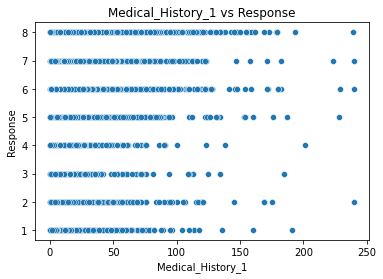

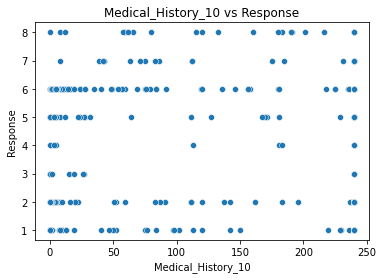

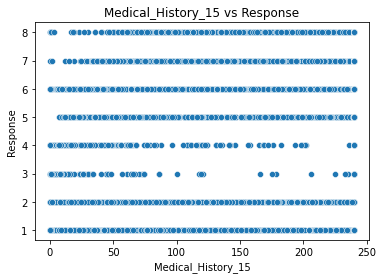

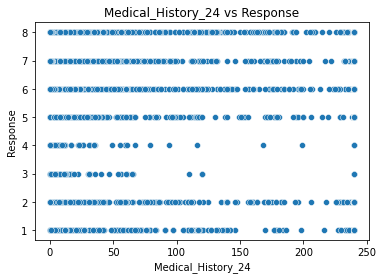

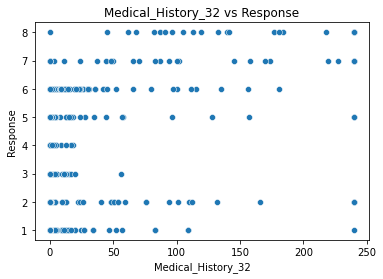

In [37]:
# Iterate over each column in cont_risk_data
for column in disc_risk_data.columns:
    # Create a scatter plot with Response on the y-axis and the current column on the x-axis
    sns.scatterplot(x=column, y='Response', data=risk_data)
    # Add a title
    plt.title(f"{column} vs Response")
    # Show the plot
    plt.show()

In [38]:
unique_counts = disc_risk_data.nunique()
unique_counts 

Medical_History_1     171
Medical_History_10    103
Medical_History_15    241
Medical_History_24    227
Medical_History_32     95
dtype: int64

<div style="color:blue">Notes: The Risk dataset includes five discrete variables that range from 0 to 240. Two of the variables, Medical_Hist_1 and Medical_Hist_32, exhibit a large number of outliers and are skewed towards the right side of the distribution. Medical_Hist_10 and Medical_Hist_15 exhibit a bimodal distribution. Finally, Medical_Hist_24 is heavily skewed towards the right side of the distribution and has a high number of outliers. The scatter plots do not show any solid patterns, except possibly in Medical_History_32; it appears that responses 3 and 4 have no associations with a Medical_History_32 observation above 60.</div>

<h1 style="color:blue"> Dummy Variables:  </h1>

In [5]:
dumm_risk_data = risk_data.filter(like='Medical_Keyword')
dumm_risk_data.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dumm_risk_data.describe()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,0.042000,0.008942,0.049275,0.014550,0.008622,0.012597,0.013910,0.010407,0.006652,0.036459,...,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496
std,0.200591,0.094141,0.216443,0.119744,0.092456,0.111526,0.117119,0.101485,0.081289,0.187432,...,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dumm_risk_data.shape[1]

48

<h1 style="color:blue"> Looking into Alpha Numeric Variable:  </h1>

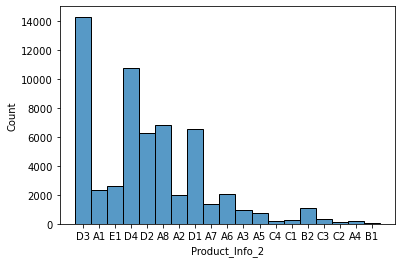

In [45]:
# Histogram of the 'Product_Info_2' column for a closer look
sns.histplot(nom_risk_data['Product_Info_2'])

plt.show()

In [46]:
risk_data['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [47]:
risk_data['Product_Info_2'].nunique()

19

In [48]:
# Perform one-hot encoding on 'Product_Info_2' column
product_info_2_encoded = pd.get_dummies(risk_data['Product_Info_2'], prefix='Product_Info_2')

# Concatenate the encoded columns with the original dataframe
risk_data_encoded = pd.concat([risk_data, product_info_2_encoded], axis=1)

# Set the pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Calculate the correlation coefficients
corr_matrix = risk_data_encoded.corr()

# Print the correlation coefficients with the target variable
print(corr_matrix['Response'].sort_values(ascending=False))

Response               1.000000
Medical_History_23     0.286584
Medical_History_15     0.277311
Medical_History_4      0.239896
Medical_History_39     0.220176
Product_Info_4         0.202434
Medical_History_6      0.159230
Medical_History_32     0.144536
Product_Info_2_D4      0.144096
Medical_History_13     0.134863
Medical_History_40     0.131519
InsuredInfo_6          0.130476
Medical_History_33     0.113112
Medical_History_1      0.103050
Product_Info_2_A6      0.092151
Medical_History_27     0.084595
InsuredInfo_1          0.083729
Employment_Info_2      0.078857
Medical_History_29     0.078089
Medical_History_20     0.077327
Medical_History_17     0.073633
Family_Hist_1          0.072107
Medical_History_9      0.067236
Employment_Info_5      0.054673
Product_Info_2_B2      0.050418
Medical_History_22     0.047906
Medical_History_31     0.046912
Product_Info_2_A5      0.046351
Medical_History_34     0.044429
Product_Info_2_E1      0.044086
Employment_Info_1      0.040852
Product_

In [49]:
# Print the correlation coefficients for the dummy variables
print(corr_matrix.filter(regex='Product_Info_2_').loc['Response'].sort_values(ascending=False))

Product_Info_2_D4    0.144096
Product_Info_2_A6    0.092151
Product_Info_2_B2    0.050418
Product_Info_2_A5    0.046351
Product_Info_2_E1    0.044086
Product_Info_2_A1    0.040823
Product_Info_2_A3    0.019280
Product_Info_2_A4    0.017813
Product_Info_2_C4    0.011934
Product_Info_2_C3   -0.000754
Product_Info_2_B1   -0.009412
Product_Info_2_C2   -0.012680
Product_Info_2_A2   -0.015758
Product_Info_2_C1   -0.016712
Product_Info_2_D3   -0.025030
Product_Info_2_A8   -0.036744
Product_Info_2_D2   -0.051448
Product_Info_2_A7   -0.132695
Product_Info_2_D1   -0.136605
Name: Response, dtype: float64


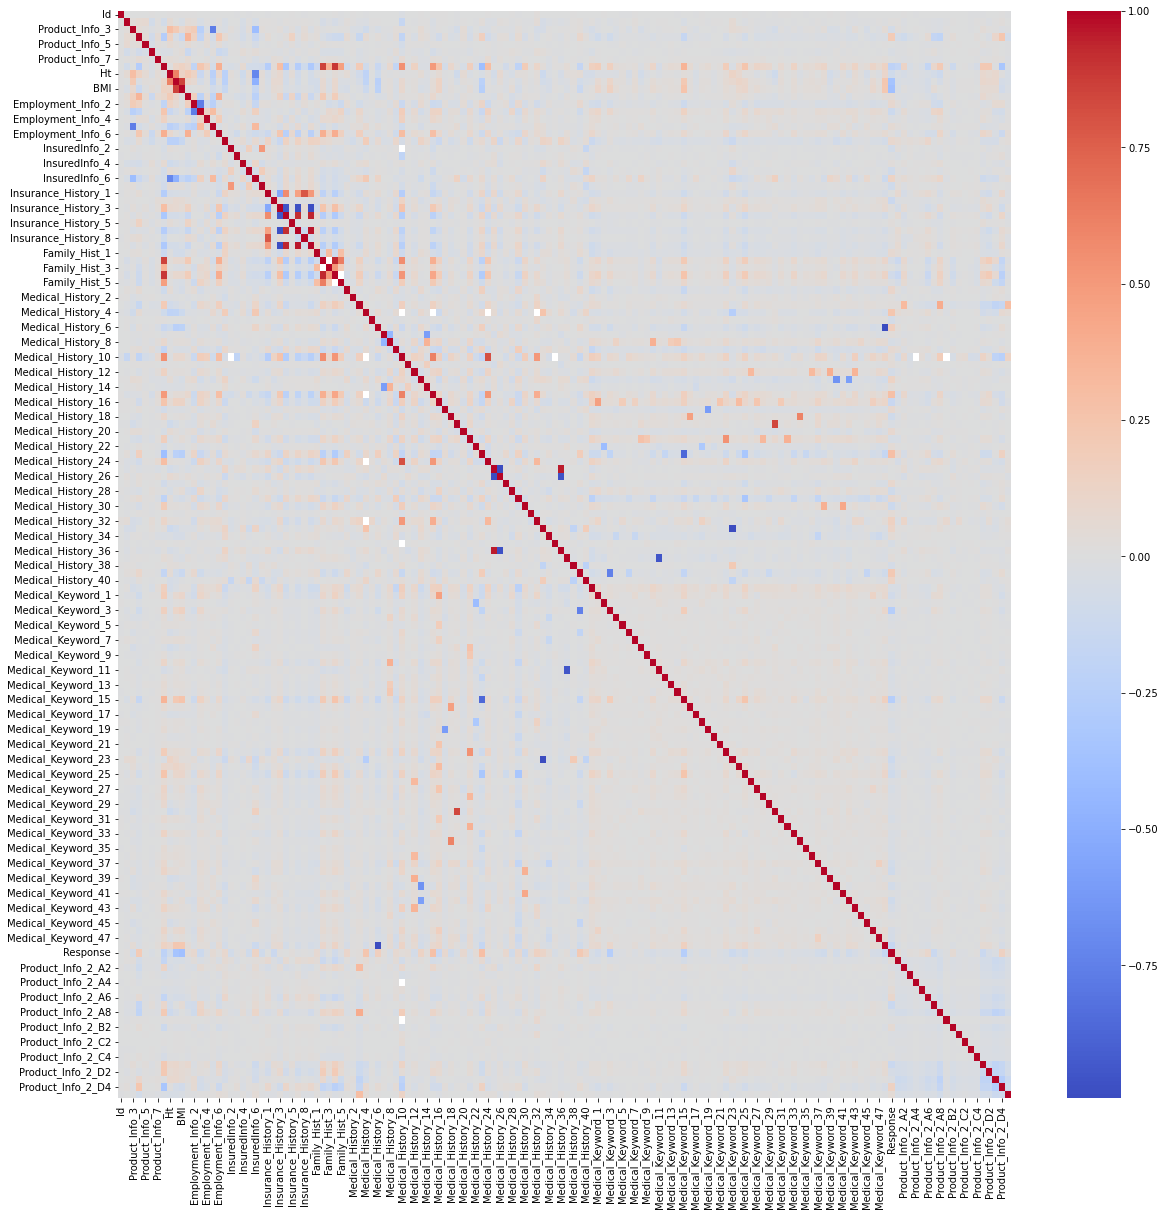

In [50]:
# Calculate the correlation coefficients
corr_matrix = risk_data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [51]:
# Find correlations greater than 0.75 or less than -0.75, but not equal to 1
strong_corr = ((corr_matrix > 0.75) | (corr_matrix < -0.75)) & (corr_matrix != 1)

# Filter the correlation matrix using the strong correlations
strong_corr_matrix = corr_matrix[strong_corr]

# Print the strong correlations, sorted in descending order
print(strong_corr_matrix.stack().sort_values(ascending=False))

Insurance_History_9  Insurance_History_7    0.962528
Insurance_History_7  Insurance_History_9    0.962528
Medical_History_36   Medical_History_25     0.954110
Medical_History_25   Medical_History_36     0.954110
Insurance_History_9  Insurance_History_4    0.938654
Insurance_History_4  Insurance_History_9    0.938654
Family_Hist_2        Family_Hist_4          0.934615
Family_Hist_4        Family_Hist_2          0.934615
Insurance_History_4  Insurance_History_7    0.919526
Insurance_History_7  Insurance_History_4    0.919526
Ins_Age              Family_Hist_4          0.895261
Family_Hist_4        Ins_Age                0.895261
Ins_Age              Family_Hist_2          0.855715
Family_Hist_2        Ins_Age                0.855715
BMI                  Wt                     0.854083
Wt                   BMI                    0.854083
Medical_Keyword_30   Medical_History_19     0.840947
Medical_History_19   Medical_Keyword_30     0.840947
Medical_History_24   Medical_History_10     0.

<h1 style="color:blue">Summary</h1>
<div style="color:blue">The dataset consists of over a hundred different variables that are all numerical with the exception of Product_info_2 which has alphanumeric characters for the different insurance packages. The variables are organized into 4 categories: categorical, continuous, discrete and dummy variables that correlate to the absence or presence of a medical keyword found in a single application.</div>
<h2 style="color:blue">Issues and Observations in the dataset</h2>
<div style="color:blue">Target Variable:</div>
<ul>
    <li style="color:blue">The response variable has 8 values and is unbalanced.</li>
</ul>
<div style="color:blue">Missing Data:</div>
<ul>
    <li style="color:blue">13 of the features have significant missing data.</li>
    <li style="color:blue">Family history 2 and 3, and 4 and 5 have strong negative correlations with one another. This may be useful for filling in the missing data.</li>
    <li style="color:blue">Other missing data have no clear relationships. My plan is to either drop these or adjust them accordingly for modeling.</li>
</ul>
<div style="color:blue">Categorical Binary Variables:</div>
<ul>
    <li style="color:blue">Some binary variables have values of 1 and 2 and some are 2 and 3.</li>
</ul>
<div style="color:blue">Categorical Ternary Variables:</div>
<ul>
    <li style="color:blue">All ternary variables have values 1-3.</li>
</ul>
<div style="color:blue">Other Categorical values:</div>
<ul>
    <li style="color:blue">Product_info_2 is alphanumeric and needs to be encoded for the model. It was one-hot encoded in this EDA and no notable relationships were found.</li>
    <li style="color:blue">Product_Info_3, Employment_Info_2, InsuredInfo_3 and Medical_History_2 are all categorical and have unique values greater than 3 and up to 579. </li>
</ul>
<div style="color:blue">Continuous Variables:</div>
<ul>
    <li style="color:blue">These continuous variables have many outliers.</li>
    <li style="color:blue">These variables are normalized values between 0-1; however, Family_hist_4 has a maximum value of 0.94 and needs to be fixed.</li>
</ul>
<div style="color:blue">Discrete Variables:</div>
<ul>
    <li style="color:blue">Significant outliers exist for these and they all have a max value of 240.</li>
</ul>
<h2 style="color:blue">Notable Correlations Among Variables </h2>
<ul>
    <li style="color:blue">BMI and weight have a correlation of 0.854.</li>
    <li style="color:blue">Employment_Info_3 and Employment_Info_2 have a correlation of -0.761.</li>
    <li style="color:blue">Family_Hist_2 and Family_Hist_4 have a correlation of 0.935.</li>
    <li style="color:blue">Ins_Age and Family_Hist_2 have a correlation of 0.856.</li>
    <li style="color:blue">Ins_Age and Family_Hist_4 have a correlation of 0.895.</li>
    <li style="color:blue">Insurance_History_1 and Insurance_History_8 have a correlation of 0.788.</li>
    <li style="color:blue">Insurance_History_3 and Insurance_History_4 have a correlation of -0.949.</li>
    <li style="color:blue">Insurance_History_4 and Insurance_History_7 have a correlation of 0.920.</li>
    <li style="color:blue">Insurance_History_7 and Insurance_History_3 have a correlation of -0.975.</li>
    <li style="color:blue">Insurance_History_9 and Insurance_History_3 have a correlation of -0.983.</li>
    <li style="color:blue">Insurance_History_9 and Insurance_History_4 have a correlation of 0.939.</li>
    <li style="color:blue">Insurance_History_9 and Insurance_History_7 have a correlation of 0.963.</li>
    <li style="color:blue">Medical_History_23 and Medical_Keyword_15 have a correlation of -0.864.</li>
    <li style="color:blue">Medical_History_24 and Medical_History_10 have a correlation of 0.806.</li>
    <li style="color:blue">Medical_History_26 and Medical_History_25 have a correlation of -0.988.</li>
    <li style="color:blue">Medical_History_26 and Medical_History_36 have a correlation of -0.965.</li>
    <li style="color:blue">Medical_History_33 and Medical_Keyword_23 have a correlation of -0.993.</li>
    <li style="color:blue">Medical_History_36 and Medical_History_25 have a correlation of 0.954.</li>
    <li style="color:blue">Medical_History_6 and Medical_Keyword_48 have a correlation of -0.993.</li>
    <li style="color:blue">Medical_Keyword_11 and Medical_History_37 have a correlation of -0.950.</li>
    <li style="color:blue">Medical_Keyword_30 and Medical_History_19 have a correlation of 0.841.</li>
    <li style="color:blue">Product_Info_3 and Employment_Info_5 have a correlation of -0.765.</li>
</ul>
<h2 style="color:blue">Strongest Correlations with Target Variable </h2>
<ul>
    <li style="color:blue">BMI has a correlation of -0.382.</li>
    <li style="color:blue">Wt has a correlation of -0.351.</li>
    <li style="color:blue">Ins_Age has a correlation of -0.210.</li>
    <li style="color:blue">Product_Info_4 has a correlation of 0.202.</li>
    <li style="color:blue">Medical_History_39 has a correlation of 0.220.</li>
    <li style="color:blue">Medical_History_4 has a correlation of 0.240.</li>
    <li style="color:blue">Medical_History_15 has a correlation of 0.277.</li>
    <li style="color:blue">Medical_History_23 has a correlation of 0.287.</li>
    <li style="color:blue">Medical_Keyword_3 has a correlation of -0.258.</li>
    <li style="color:blue">Medical_Keyword_15 has a correlation of -0.259.</li>
</ul>
<p><div style="color:blue">I am planning to use tree-based models for modeling. As these models have robust handling of outliers, I am not overly concerned about them currently. However, I need to address NaN values after finalizing my choice of models.</div></p>